In [21]:
import json

with open('12channels_data.txt') as f:
    data = json.load(f)

In [22]:
import pandas as pd

df = pd.DataFrame(data)

In [23]:
df.head()

,meta,data
users,"{'367333391793782804': {'name': 'frahlg', 'tag...",NaN
userindex,"[367333391793782804, 694605530714341496, 37522...",NaN
servers,"[{'name': 'Applied IoT course @ LNU', 'type': ...",NaN
channels,"{'873223660217982987': {'server': 0, 'name': '...",NaN
873223660217982987,NaN,"{'873231611582361630': {'u': 0, 't': 162826504..."


In [24]:
df.loc["channels","meta"]

{'873223660217982987': {'server': 0,
  'name': 'course-feedback',
  'position': 30},
 '1121430309020373084': {'server': 0,
  'name': 'report-feedback',
  'position': 31},
 '869511835156627496': {'server': 0,
  'name': '🎓project-discussions',
  'position': 28},
 '872387597576568863': {'server': 0,
  'name': '💼jobs-and-projects',
  'position': 29},
 '723208004605837374': {'server': 0,
  'name': '❓questions-and-answers',
  'position': 20},
 '859423048066007141': {'server': 0, 'name': '💯higher-grade', 'position': 21},
 '835872730947125328': {'server': 0, 'name': '🛒what-to-buy', 'position': 22},
 '722668621788086315': {'server': 0, 'name': '🔀random', 'position': 23},
 '836256613613568004': {'server': 0, 'name': '♻buy-and-sell', 'position': 24},
 '836218592763707452': {'server': 0,
  'name': '✨chat-with-electrokit',
  'position': 25},
 '984872171685961738': {'server': 0,
  'name': '📏chat-with-sizable',
  'position': 26},
 '854037082087227429': {'server': 0,
  'name': '💡project-inspiration',


In [25]:
df.index

Index(['users', 'userindex', 'servers', 'channels', '873223660217982987',
       '1121430309020373084', '869511835156627496', '872387597576568863',
       '723208004605837374', '859423048066007141', '835872730947125328',
       '722668621788086315', '836256613613568004', '836218592763707452',
       '984872171685961738', '854037082087227429'],
      dtype='object')

In [26]:
rows = ['873223660217982987',
       '1121430309020373084', '869511835156627496', '872387597576568863',
       '723208004605837374', '859423048066007141', '835872730947125328',
       '722668621788086315', '836256613613568004', '836218592763707452',
       '984872171685961738', '854037082087227429']
channel_info = df.loc["channels","meta"]
df_messages = pd.DataFrame()
for r in rows: 
    df_m = pd.DataFrame(df.loc[r,'data'])
    df_m = df_m.T
    df_m['channel'] = channel_info[r]['name']
    df_messages = pd.concat([df_messages,df_m])
    

In [27]:
df_messages.head()

,u,t,m,re,te,r,e,a,channel
873231611582361630,0,1628265040060,There will be a Survey from Linnéuniversitetet...,"[{'c': 3, 'n': '☝️'}, {'c': 5, 'n': '👍'}, {'c'...",NaN,NaN,NaN,NaN,course-feedback
873281516417986560,1,1628276938300,Didn't realise the due date for the peer revie...,"[{'c': 2, 'n': '👍'}]",NaN,NaN,NaN,NaN,course-feedback
873305214638252102,2,1628282588396,It was a great course and nice summer with eve...,"[{'c': 5, 'n': '👍'}, {'c': 3, 'n': '💯'}]",NaN,NaN,NaN,NaN,course-feedback
873313450267406406,3,1628284551923,Thanks for the course! Very easy to follow alo...,"[{'c': 2, 'n': '👍'}]",1628284563177,NaN,NaN,NaN,course-feedback
873582797418283058,4,1628348769288,Thank you for the course! :-),"[{'c': 2, 'n': '👍'}]",NaN,NaN,NaN,NaN,course-feedback


In [28]:
len(df_messages)

12426

## Clean data from html 


In [29]:
from bs4 import BeautifulSoup
import warnings

def clean_html(text):
    warnings.filterwarnings("ignore", category=UserWarning, module='bs4')
    soup = BeautifulSoup(str(text), "html.parser")

    txt=soup.text # remove html tags
    txt = txt.lower()
   
    return txt

df_messages['message'] = df_messages['m'].apply(clean_html)

In [30]:
df_messages.head()

,u,t,m,re,te,r,e,a,channel,message
873231611582361630,0,1628265040060,There will be a Survey from Linnéuniversitetet...,"[{'c': 3, 'n': '☝️'}, {'c': 5, 'n': '👍'}, {'c'...",NaN,NaN,NaN,NaN,course-feedback,there will be a survey from linnéuniversitetet...
873281516417986560,1,1628276938300,Didn't realise the due date for the peer revie...,"[{'c': 2, 'n': '👍'}]",NaN,NaN,NaN,NaN,course-feedback,didn't realise the due date for the peer revie...
873305214638252102,2,1628282588396,It was a great course and nice summer with eve...,"[{'c': 5, 'n': '👍'}, {'c': 3, 'n': '💯'}]",NaN,NaN,NaN,NaN,course-feedback,it was a great course and nice summer with eve...
873313450267406406,3,1628284551923,Thanks for the course! Very easy to follow alo...,"[{'c': 2, 'n': '👍'}]",1628284563177,NaN,NaN,NaN,course-feedback,thanks for the course! very easy to follow alo...
873582797418283058,4,1628348769288,Thank you for the course! :-),"[{'c': 2, 'n': '👍'}]",NaN,NaN,NaN,NaN,course-feedback,thank you for the course! :-)


## Sentiment analysis with TextBlob

In [31]:
from textblob import TextBlob

df_messages['sentiment'] = df_messages['message'].apply(lambda msg: TextBlob(str(msg)).sentiment.polarity)

In [32]:
df_messages['timestamp'] = pd.to_datetime(df_messages['t'].astype(int), unit='ms', errors = 'coerce')

df_messages.set_index('timestamp', inplace=True)


In [33]:
df_messages

,u,t,m,re,te,r,e,a,channel,message,sentiment
timestamp,,,,,,,,,,,
2021-08-06 15:50:40.060,0,1628265040060,There will be a Survey from Linnéuniversitetet...,"[{'c': 3, 'n': '☝️'}, {'c': 5, 'n': '👍'}, {'c'...",NaN,NaN,NaN,NaN,course-feedback,there will be a survey from linnéuniversitetet...,0.296023
2021-08-06 19:08:58.300,1,1628276938300,Didn't realise the due date for the peer revie...,"[{'c': 2, 'n': '👍'}]",NaN,NaN,NaN,NaN,course-feedback,didn't realise the due date for the peer revie...,0.308667
2021-08-06 20:43:08.396,2,1628282588396,It was a great course and nice summer with eve...,"[{'c': 5, 'n': '👍'}, {'c': 3, 'n': '💯'}]",NaN,NaN,NaN,NaN,course-feedback,it was a great course and nice summer with eve...,0.287500
2021-08-06 21:15:51.923,3,1628284551923,Thanks for the course! Very easy to follow alo...,"[{'c': 2, 'n': '👍'}]",1628284563177,NaN,NaN,NaN,course-feedback,thanks for the course! very easy to follow alo...,0.314722
2021-08-07 15:06:09.288,4,1628348769288,Thank you for the course! :-),"[{'c': 2, 'n': '👍'}]",NaN,NaN,NaN,NaN,course-feedback,thank you for the course! :-),0.500000
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-13 13:44:04.259,156,1655127844259,https://www.youtube.com/watch?v=30Eww40s9D0&t=1s,"[{'c': 3, 'n': '👍'}]",NaN,NaN,[{'url': 'https://www.youtube.com/watch?v=30Ew...,NaN,💡project-inspiration,https://www.youtube.com/watch?v=30eww40s9d0&t=1s,0.000000
2022-06-13 18:31:14.350,34,1655145074350,"Wasn't planning on it at first, but I'm probab...","[{'c': 5, 'n': '👍'}, {'c': 1, 'n': '👍🏻'}]",NaN,NaN,NaN,[{'url': 'https://cdn.discordapp.com/attachmen...,💡project-inspiration,"wasn't planning on it at first, but i'm probab...",0.312500
2022-06-13 20:24:57.847,348,1655151897847,You can use 3D printers for free at GoTo10 in ...,"[{'c': 1, 'n': '👍'}]",NaN,985974646925058128,NaN,NaN,💡project-inspiration,you can use 3d printers for free at goto10 in ...,0.400000


<AxesSubplot: xlabel='timestamp'>

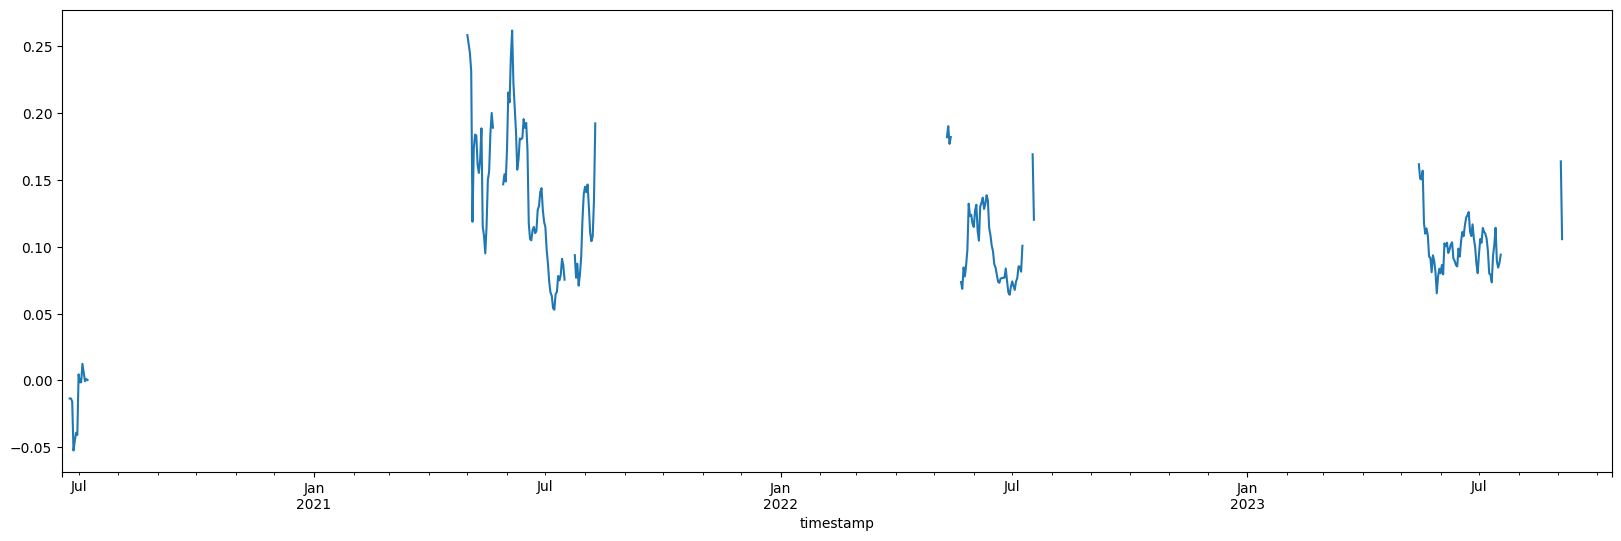

In [34]:
#df_2022 = df_messages[df_messages.index.year == 2022]
import matplotlib.pyplot as plt

plt.figure(figsize=(20,6))
df_messages['sentiment'].resample('D').mean().rolling(window=7).mean().plot()

### Try to use open AI for sentiment analysis

In [1]:
import openai

#BE CAREFUL TO NOT TO SHARE/PUSH TO GIT YOUR API KEy
# Put your APIKey
openai.api_key = 'APIKey'
response = openai.ChatCompletion.create(
      model="gpt-3.5-turbo",
      messages=[
            {"role": "system", "content": "You are an assistant that can analyze the sentiment of a piece of text. Give your answer as one word only but not just positive or negative."},
            {"role": "user", "content": f"What's the sentiment of the following text: 'TESTING YOU HAHAHA'"}
        ]
    )

# Extract only the assistant's reply
sentiment = response['choices'][0]['message']['content']
print(sentiment)

Playful


## Update your API KEY for Open AI here:

In [39]:
import openai

#BE CAREFUL TO NOT TO SHARE/PUSH TO GIT YOUR API KEy
openai.api_key = 'APIKey'

def get_sentiment(message):
    response = openai.ChatCompletion.create(
      model="gpt-3.5-turbo",
      messages=[
            {"role": "system", "content": "You are an assistant that can analyze the sentiment of a piece of text. Give your answer as one word only but not just positive or negative."},
            {"role": "user", "content": f"What's the sentiment of the following text: '{message}'"}
        ]
    )

    # Extract only the assistant's reply
    sentiment = response['choices'][0]['message']['content']

    return sentiment

df_messages_subset = df_messages[1:100]
df_messages_subset['gpt_sentiment'] = df_messages_subset['message'].apply(get_sentiment)

/var/folders/bl/02tnlb3j63n87b_hctf4mh380000gq/T/ipykernel_16475/2760875745.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_messages_subset['gpt_sentiment'] = df_messages_subset['message'].apply(get_sentiment)


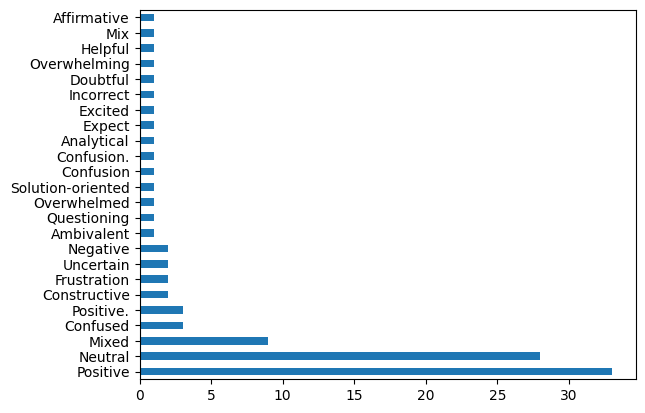

In [40]:
df_messages_subset['gpt_sentiment'].value_counts().plot.barh()
plt.show()

### Use Chat GPT to assigng topics of the messages


In [41]:
df_messages[df_messages.channel == '❓questions-and-answers']

,u,t,m,re,te,r,e,a,channel,message,sentiment
timestamp,,,,,,,,,,,
2023-08-24 23:54:42.945,102,1692921282945,hey i cannot see the canva class anymore,NaN,NaN,NaN,NaN,NaN,❓questions-and-answers,hey i cannot see the canva class anymore,0.000000
2023-08-25 07:49:17.459,34,1692949757459,As the course is pretty much done in terms of ...,NaN,NaN,1144419549740019793,NaN,NaN,❓questions-and-answers,as the course is pretty much done in terms of ...,0.090000
2023-08-25 10:07:26.165,60,1692958046165,Nobody rated my submission 🥲 The system made m...,NaN,NaN,NaN,NaN,NaN,❓questions-and-answers,nobody rated my submission 🥲 the system made m...,-0.100000
2023-08-25 10:09:48.119,34,1692958188119,I can't really remember exactly the layout of ...,NaN,NaN,1144573745860706354,NaN,NaN,❓questions-and-answers,i can't really remember exactly the layout of ...,0.308929
2023-08-25 10:11:27.029,60,1692958287029,NaN,NaN,NaN,NaN,NaN,[{'url': 'https://cdn.discordapp.com/attachmen...,❓questions-and-answers,nan,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-18 16:55:20.319,448,1592499320319,Blir det nåt om Sigfox på kursen?,NaN,NaN,NaN,NaN,NaN,❓questions-and-answers,blir det nåt om sigfox på kursen?,0.000000
2020-06-18 16:57:54.573,448,1592499474573,Är ändå intresaant att känna till,NaN,NaN,NaN,NaN,NaN,❓questions-and-answers,är ändå intresaant att känna till,0.000000
2020-06-18 16:57:59.243,430,1592499479243,Jag såg att du använde CCS811 till din dashboa...,NaN,NaN,NaN,NaN,NaN,❓questions-and-answers,jag såg att du använde ccs811 till din dashboa...,0.000000


In [ ]:

#❓questions-and-answers
def get_topic_category(message):
    response = openai.Completion.create(
      model="text-davinci-002",
      prompt="""
      I am giving you a message student sent when they had problems with our IoT course, 
                give me the Broader category for this message like the following: 
                Sensors, Programming, Unclear Requirements, Browser/Email issues, Grading, Deadlines, Gratitude(giving thanks), Canvas and Other.
      Answer with 1-3 words of a topic name, no other text. 
      """.format(message),  
      temperature=0.3,
      max_tokens=500
    )

    return response.choices[0].text.strip()

df_messages_subset = df_messages[df_messages.channel == '❓questions-and-answers'][1:100]
df_messages_subset['gpt_category'] = df_messages_subset['message'].apply(get_topic_category)

In [ ]:
df_messages_subset['gpt_category'].value_counts().plot.barh()
plt.show()

In [ ]:
df_messages_subset[df_messages_subset['gpt_category']=="Digital Resources"].m[0]

## Combine traditional NLTK and Chat GPT for generating FAQs

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora, models
import gensim
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import nltk
nltk.download('punkt')

# your function to determine if a sentence is a question
def is_question(text):
    return '?' in text

df_messages_subset = df_messages[df_messages.channel == '❓questions-and-answers']

df_questions = df_messages_subset[df_messages_subset['message'].apply(is_question)]

# Preprocess text
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_questions['message'])

# initialize count vectorizer
#vectorizer = CountVectorizer(analyzer='word', lowercase=True, tokenizer=nltk.word_tokenize, token_pattern='[a-zA-Z]{3,}')

data_vectorized = X

# convert to gensim format
corpus = gensim.matutils.Sparse2Corpus(data_vectorized, documents_columns=False)

# creating a vocabulary dictionary and converting it to gensim dictionary
id2word = {v: k for k, v in vectorizer.vocabulary_.items()}
id2word = corpora.Dictionary.from_corpus(corpus, id2word=id2word)

# Use the gensim.models.ldamodel.LdaModel constructor to estimate
# LDA model parameters on the corpus, and save to the variable `ldamodel`
ldamodel = gensim.models.LdaModel(corpus, num_topics=3, id2word=id2word, passes=25)

# visualizing topics
vis = gensimvis.prepare(ldamodel, corpus, id2word)
pyLDAvis.display(vis)

In [ ]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# your function to determine if a sentence is a question
def is_question(text):
    return '?' in text

df_messages_subset = df_messages[df_messages.channel == '❓questions-and-answers']

df_questions = df_messages_subset[df_messages_subset['message'].apply(is_question)]

# Preprocess text
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_questions['message'])

# Cluster data
num_clusters = 15  # define the number of clusters you want
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

# Now you can assign each question to a cluster
df_questions.loc[:, 'Cluster'] = kmeans.labels_

# Get the number of questions in each cluster
cluster_counts = df_questions['Cluster'].value_counts().sort_index()

# Convert the counts to a list, which will serve as the weights for each cluster/question
weights = cluster_counts.tolist()

# lambda function to retrieve cluster count or weight based on cluster id 
get_weight = lambda x: weights[int(x)]

 

In [ ]:
df_questions

In [ ]:
# Get representative questions for each cluster
faqs = dict(
    cluster=[],
    question=[],
    description=[],
    weights=[]
)
for i in range(num_clusters):
    cluster = df_questions[df_questions.Cluster == i][0:100]
    print(len(cluster))
    text = ' '.join(cluster['message'].values)[0:3000]
    print(len(text))
    # use GPT-3 to create summary for each cluster
    response = openai.ChatCompletion.create(
      model="gpt-4",
      messages=[
            {"role": "system", "content": f"Please summarize these questions and assign a name to this category of questions:\n{text}. Summarize the questions into exaclty one category - [Name of the category], don't use exact questions from my text. Only one category and max 3 questions for the category. Respond in the following format: [Name of the category]: [Your questions]."
    }
        ],
      temperature=0.2
    )
    faqs['cluster'].append(str(i))
    ai_response = response['choices'][0]['message']['content']
  
    s_split = ai_response.split(':')

    # strip the whitespace and brackets
    question_category = s_split[0].strip('[ ] ')

    faqs['question'].append(question_category)
    faqs['description'].append(s_split[1])
    faqs['weights'].append(get_weight(i))
    #print(f"General questions for cluster {faqs['question']}: {faqs['description']}") 

In [ ]:
print(faqs)

In [ ]:
# convert your data to a pandas dataframe
df = pd.DataFrame(faqs)

# sort by weights
df = df.sort_values('weights')

# plot bar plot
plt.figure(figsize=(8, 8))
plt.barh(df['question'], df['weights'])
plt.xlabel('Weights')
plt.ylabel('Cluster')
plt.title('Cluster Weights')
plt.show()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# assuming df is your DataFrame and it has columns 'cluster' and 'question'
clustered_data = df.groupby('question')['description'].apply(' '.join).reset_index() 

fig, axs = plt.subplots(len(clustered_data), 1, figsize=(20,10))

for i, ax in enumerate(axs.flat):
    wc = WordCloud(background_color='white').generate(clustered_data.loc[i, 'description'])
    ax.imshow(wc)
    ax.axis('off')
    ax.set_title(f"Wordcloud for cluster: {clustered_data.loc[i, 'question']}")

In [ ]:
from wordcloud import WordCloud

# Assuming faqs is your dictionary 
df = pd.DataFrame(faqs)

# Creating a new dataframe which contains aggregated questions per cluster
clustered_data = df.groupby('question')['description'].apply(' '.join).reset_index() 


# Adding subplots for wordclouds
for i in range(len(clustered_data)):
    print("Question:")
    print(clustered_data.loc[i, 'question'])
    
    text = clustered_data.loc[i, 'description']
    print(text)
    # Create and generate a word cloud image
    wordcloud = WordCloud(background_color="white").generate(text)

    # Display the generated image
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

## Wordcloud of all course feedback messages

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df = df_messages[df_messages.channel == 'course-feedback']
text = ' '.join(review for review in df.message)

# Create and generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()